<a href="https://colab.research.google.com/github/white840117/LIS707/blob/main/TextVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import io

In [35]:
# Import the dataset
from google.colab import files
uploaded = files.upload()

Saving comments.csv to comments (4).csv


In [36]:
filename = next(iter(uploaded))
texts = pd.read_csv(io.BytesIO(uploaded[filename]))
texts["comments"] = texts["comments"].str.replace(r"\\", "") ## Depending on your dataset, you may need to change here accordingly.
texts

,comments
0,Great Professor with great chemistry knowledge...
1,This class was a lot of funny. Didn\'t want to...
2,By far the worst teacher I have ever had in my...
3,Very difficult to understand
4,This wasn\'t a bad class. He seems to know wha...
...,...
4785,Very nice guy cares about his students and tea...
4786,I took his class in Spring 2009. Excellent tea...
4787,I had Bill for his first year at Acadia - he w...
4788,Hellish course but with Dr. Ritchie it morphed...


In [37]:
### Input your dataset here if you choose to user your own dataset

pass

In [38]:
#define a lemmatizer class
class LemmaTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
    def __call__(self, doc):
      res = []
      for token in self.nlp(doc):
        if not token.is_punct and not token.like_num and len(token.lemma_) > 2: # not punctuation or numbers and length > 2
          res.append(token.lemma_) # lemmatize
      return res

In [39]:
# Test the lemmatizer on one sentence first

text = texts.loc[10,"comments"]
lt = LemmaTokenizer()
doc = lt(text)
doc

['very',
 'EASY',
 'but',
 'you',
 'need',
 'class',
 'and',
 'LISTEN',
 'work',
 'the',
 'problems',
 'and',
 'make',
 'sure',
 'you',
 'understand',
 'and',
 'MOST',
 'IMPORTANTLY',
 'take',
 'great',
 'note',
 'open',
 'BOOK',
 'OPEN',
 'NOTE',
 'test',
 'take',
 'HIM',
 'again']

In [40]:
# Remove stopwords, and convert the texts into a word count matrix
from sklearn.feature_extraction.text import CountVectorizer
ngram_range = (1,1) # unigram only
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",   # You can pass in your own stopword list
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df1

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(


,"""videos",(hint,(some,-5pg,-especially,-not,-sr,-veronica,.lot,010b,...,zelazo,zheng,zipper,zirino,ziv,zombie,zone,zoology,zunz,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# get word frequency list
word_frequency = count_vect_df1.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,class,4219
1,good,1240
2,teacher,1181
3,easy,1152
4,professor,1151
...,...,...
7009,"""videos",1
7010,(hint,1
7011,10pg,1
7012,10:30,1


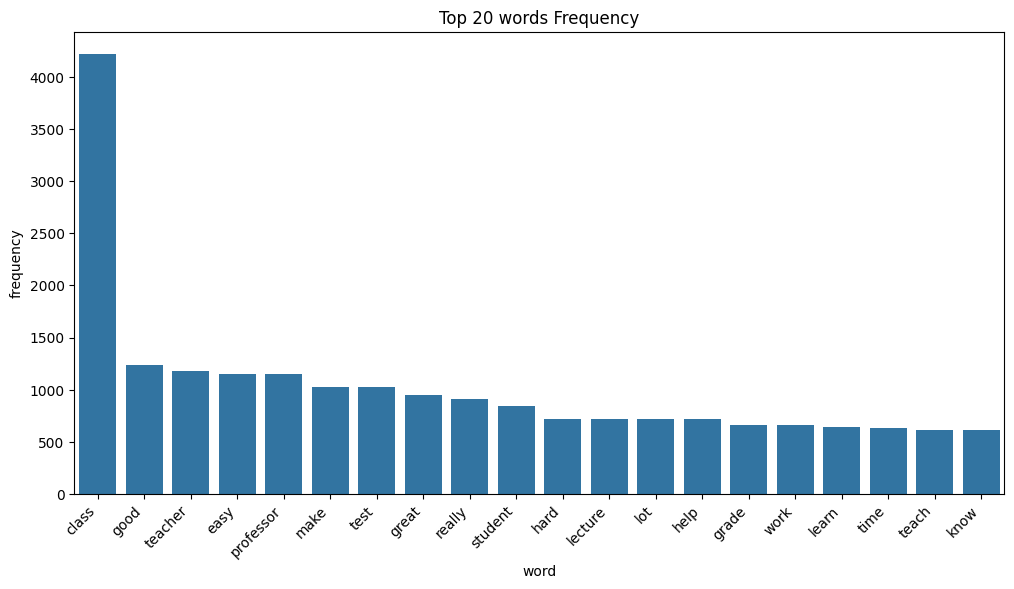

In [42]:
# Question 1: Please  create a bar chart to show the frequency for top 20 words.
word_frequency_uni = count_vect_df1.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency_uni.columns = ["word", "frequency"]
plt.figure(figsize=(12, 6)) # Set chart size
sns.barplot(x='word', y='frequency', data=word_frequency.head(20)) # Get top 20 words
plt.xticks(rotation=45, ha='right') # Rotate th3 x-axis label 45 degrees
plt.title('Top 20 words Frequency') # Set titles
plt.show()

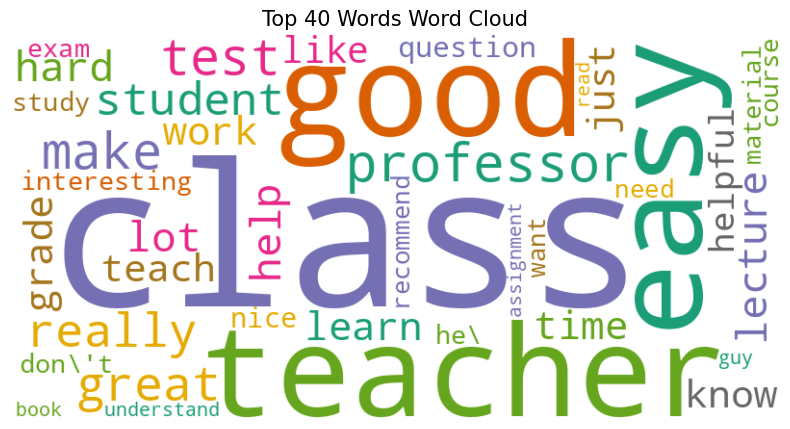

In [51]:
# Question 2: Please create a word cloud out of the text data.
# Change the background and text color to colors of your choice.
# Limit the number of words to be no more than 40.
# You should apply the best design practices to make the word cloud accessible.
from wordcloud import WordCloud
# background_color='white' for Accessibility
# colormap='Dark2' contrast with background
# max_words=40 for no more than 40
word_freq_fixed = count_vect_df1.sum(axis=0).sort_values(ascending=False).reset_index()
word_freq_fixed.columns = ["word", "frequency"]
data = dict(zip(word_freq_fixed['word'], word_freq_fixed['frequency']))
wc = WordCloud(
    background_color='white',
    colormap='Dark2',
    max_words=40,
    width=800,
    height=400
).generate_from_frequencies(data)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # close the axis
plt.title('Top 40 Words Word Cloud', fontsize=15)
plt.show()

In [44]:
# This calcualtes bigram matrix
ngram_range = (2,2)
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df2

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(


,"""videos help",(hint hint,(some say,-5pg long,-especially book,-not fault,-not update,.lot work,010b spring,10+pg research,...,zheng tell,zipper backpack,zirino great,ziv amazing,ziv really,zombie apocalypse,zone meet,zoology seminar,zunz really,zzzzzzzzz it\
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# get the phrase frequency list
word_frequency = count_vect_df2.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,great teacher,227
1,good teacher,217
2,good professor,177
3,make sure,169
4,easy class,149
...,...,...
45970,half online,1
45971,half page,1
45972,half people,1
45973,half point,1


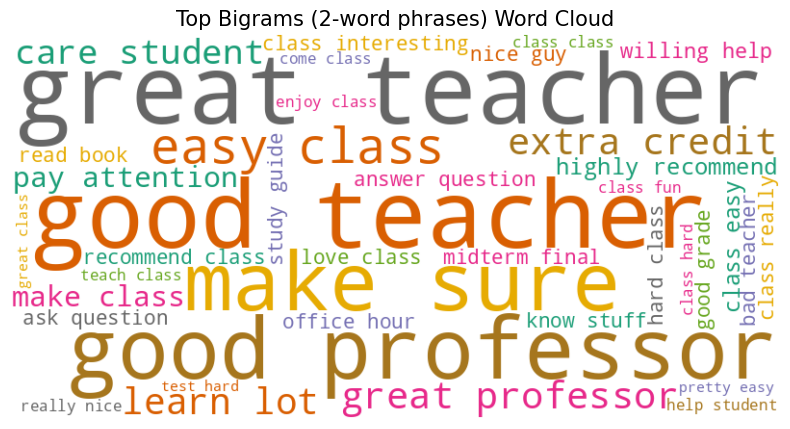

In [52]:
# Question 3: Please create a word cloud based on the bi-gram, i.e., 2-word phrase cloud
word_freq_bigram = count_vect_df2.sum(axis=0).sort_values(ascending=False).reset_index()
word_freq_bigram.columns = ["word", "frequency"]
data = dict(zip(word_freq_bigram['word'], word_freq_bigram['frequency']))
wc = WordCloud(
    background_color='white',
    colormap='Dark2',
    width=800,
    height=400,
    max_words=40
).generate_from_frequencies(data)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top Bigrams (2-word phrases) Word Cloud', fontsize=15)
plt.show()

In [47]:
# This creates the trigram matrix
ngram_range = (3,3)
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df3 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df3

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  warnings.warn(


,"""videos help explain",(hint hint type,(some say tricky,-5pg long 30pg,-especially book report-,-not update limited,.lot work stick,010b spring semester,10+pg research paper,100%s test time,...,zheng tell lot,zipper backpack miss,zirino great guy,ziv amazing personality,ziv really convey,zombie apocalypse class,zone meet new,zoology seminar week,zunz really enthusiastic,zzzzzzzzz it\ year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# get the phrase frequency list
word_frequency = count_vect_df3.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,really care student,35
1,make sure understand,30
2,make class interesting,30
3,good professor i\'ve,24
4,highly recommend class,24
...,...,...
67134,good teach exactly,1
67135,good teach equation,1
67136,good teach course,1
67137,good talker advertising,1


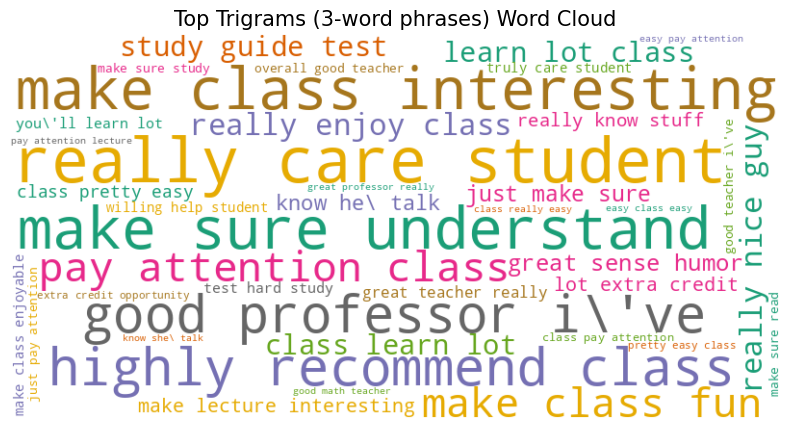

In [53]:
# Question 4: Please create a word cloud based on the tri-gram, i.e., 3-word phrase cloud
word_freq_trigram = count_vect_df3.sum(axis=0).sort_values(ascending=False).reset_index()
word_freq_trigram.columns = ["word", "frequency"]
data = dict(zip(word_freq_trigram['word'], word_freq_trigram['frequency']))
wc = WordCloud(
    background_color='white',
    colormap='Dark2',
    width=800,
    height=400,
    max_words=40
).generate_from_frequencies(data)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top Trigrams (3-word phrases) Word Cloud', fontsize=15, style=)
plt.show()